# Clustering - Veriyi Benzerliklerine Göre Kümelendirme

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('cars.xls')

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
# hatirlatma
#regression r2 RMSE
#classification accuracy, f1 score classification report and confusion matrix
#clustering silhouette score

In [6]:
x=df[['Price',"Mileage",'Cylinder']]

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [27]:
model=KMeans(7)

In [28]:
model= model.fit(x)

C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [29]:
tahmin=model.predict(x)

In [30]:
tahmin

array([2, 2, 2, 4, 4, 4, 4, 4, 4, 0, 2, 2, 1, 4, 4, 4, 4, 0, 0, 0, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 0, 1, 1, 1, 1, 1, 1, 4, 0, 0, 0, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 3, 6, 6, 6, 6, 6,
       6, 6, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6,
       3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 1, 6, 6, 6, 6, 6, 3, 3,
       3, 3, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 2, 2, 4, 4, 4, 4, 4, 4, 0, 0, 2, 2, 2, 2, 2, 4,
       4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2, 4, 4, 4, 4, 4, 4,
       0, 0, 2, 2, 2, 4, 4, 4, 4, 4, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       2, 2, 4, 4, 4, 4, 4, 0, 0, 0, 2, 2, 4, 4, 4, 4, 4, 4, 4, 0, 2, 2,
       2, 4, 4, 4, 4, 4, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4, 4, 0, 2, 2, 4, 4,
       4, 4, 4, 4, 4, 0, 2, 4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 2, 4, 4, 4, 4,
       4, 4, 0, 0, 2, 4, 4, 4, 4, 4, 4, 0, 0, 0, 2,

In [31]:
x['cluster']=tahmin

C:\Users\karsa\AppData\Local\Temp\ipykernel_4032\1051485789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [32]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,4
4,16339.170324,19832,6,4


In [33]:
silhouette_score(x,tahmin)

0.367578805461259

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'fiyat')

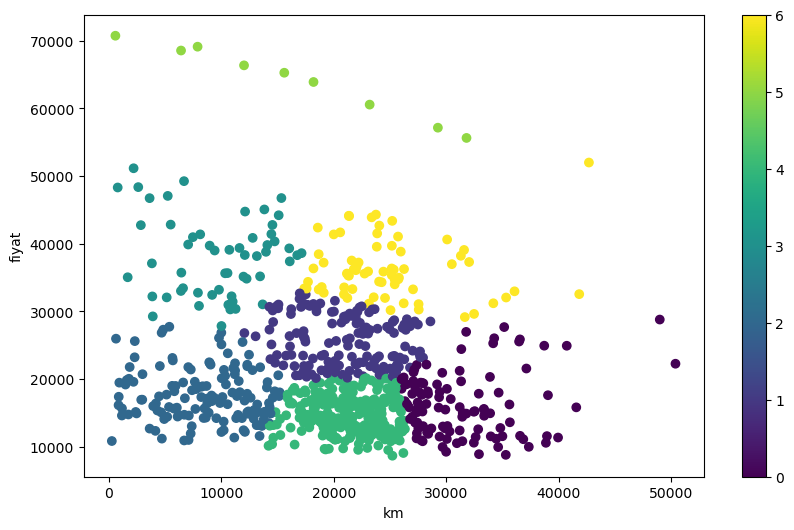

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price, c=tahmin)
plt.colorbar()
plt.xlabel("km")
plt.ylabel("fiyat")

In [39]:
#wcss= within cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.45170118006137006
0.41584757106885706
0.4132860757183528
0.3536526517590687
0.3474650529892041
0.3579541121777089
0.33499578787863354
0.337504802208503


C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

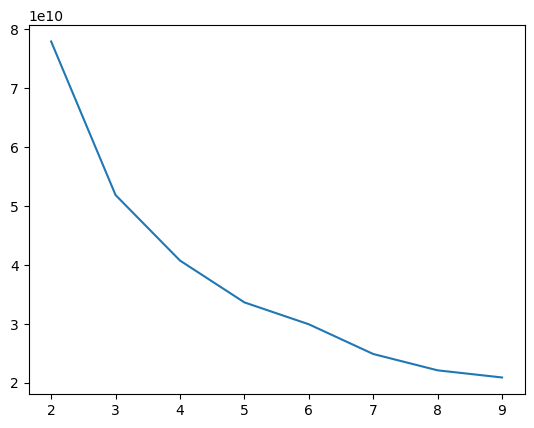

In [41]:
plt.plot(range(2,10),wcss)

In [42]:
import seaborn as sns

<Axes: >

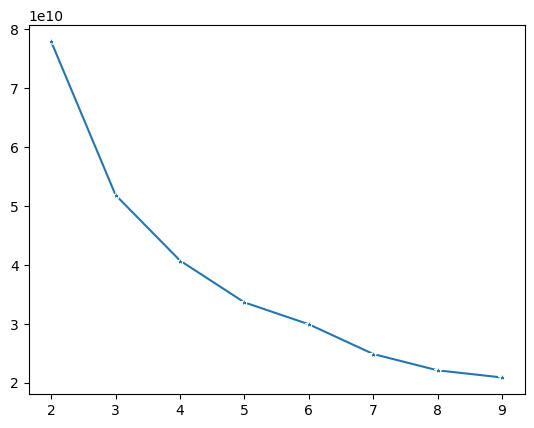

In [44]:
sns.lineplot(x=range(2,10),y=wcss,marker='*')

In [ ]:
#pip install yellowbrick

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

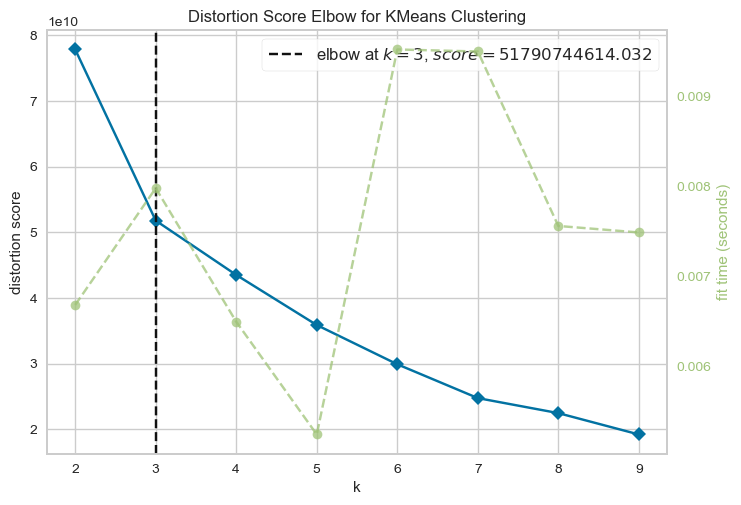

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(x)
vis.show()

In [49]:
#Hieeachical Clustering

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [51]:
data=linkage(x, method='ward',metric='euclidean')

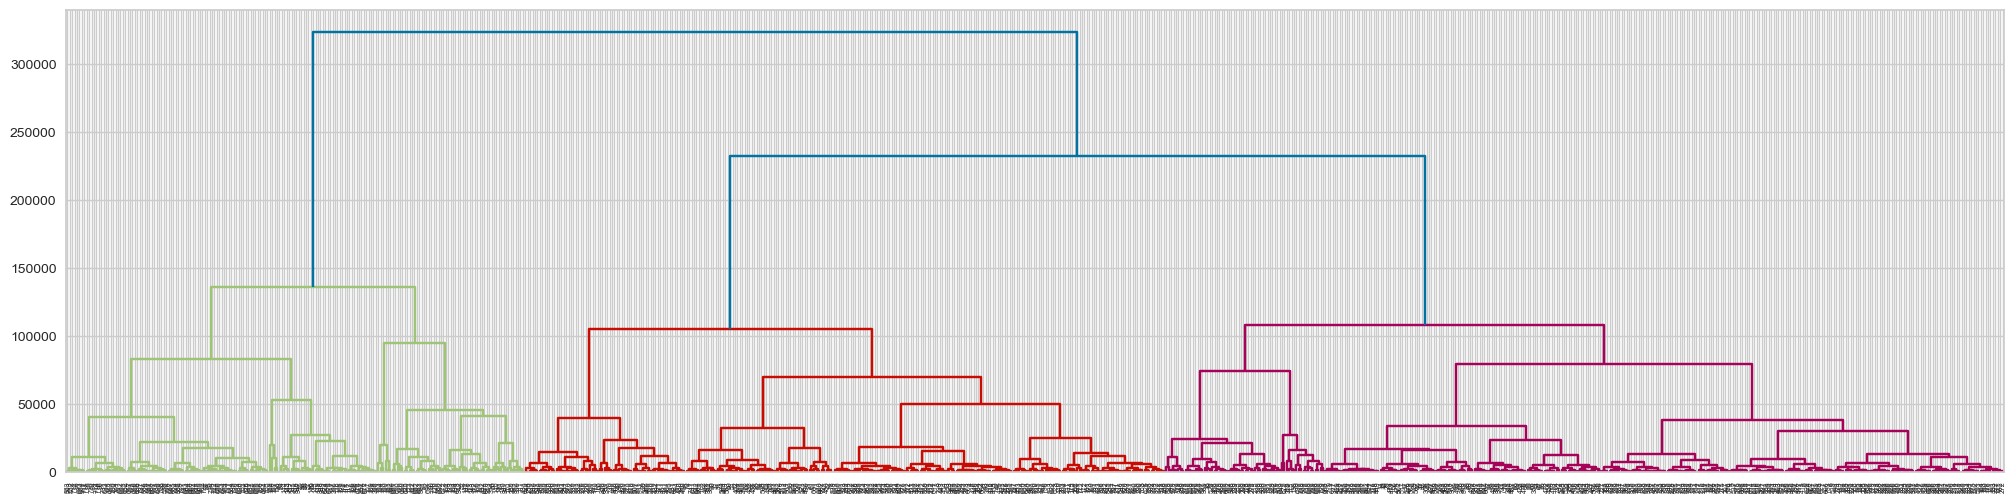

In [53]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [55]:
df=pd.read_csv('Billionaires.csv')

In [56]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


<Axes: xlabel='selfMade', ylabel='count'>

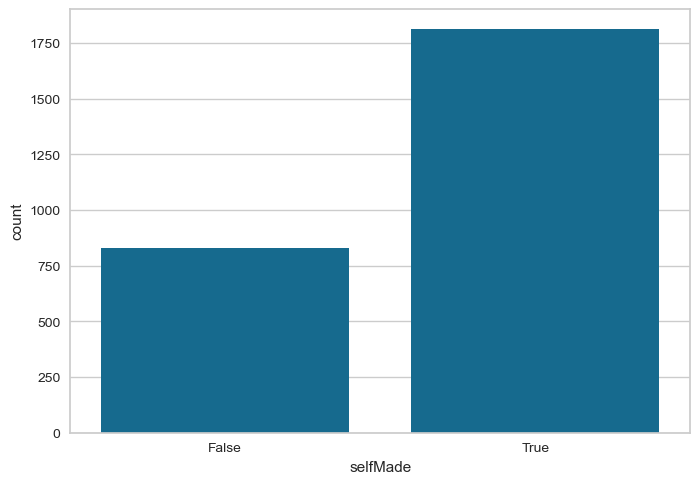

In [57]:
sns.countplot(x=df['selfMade'])

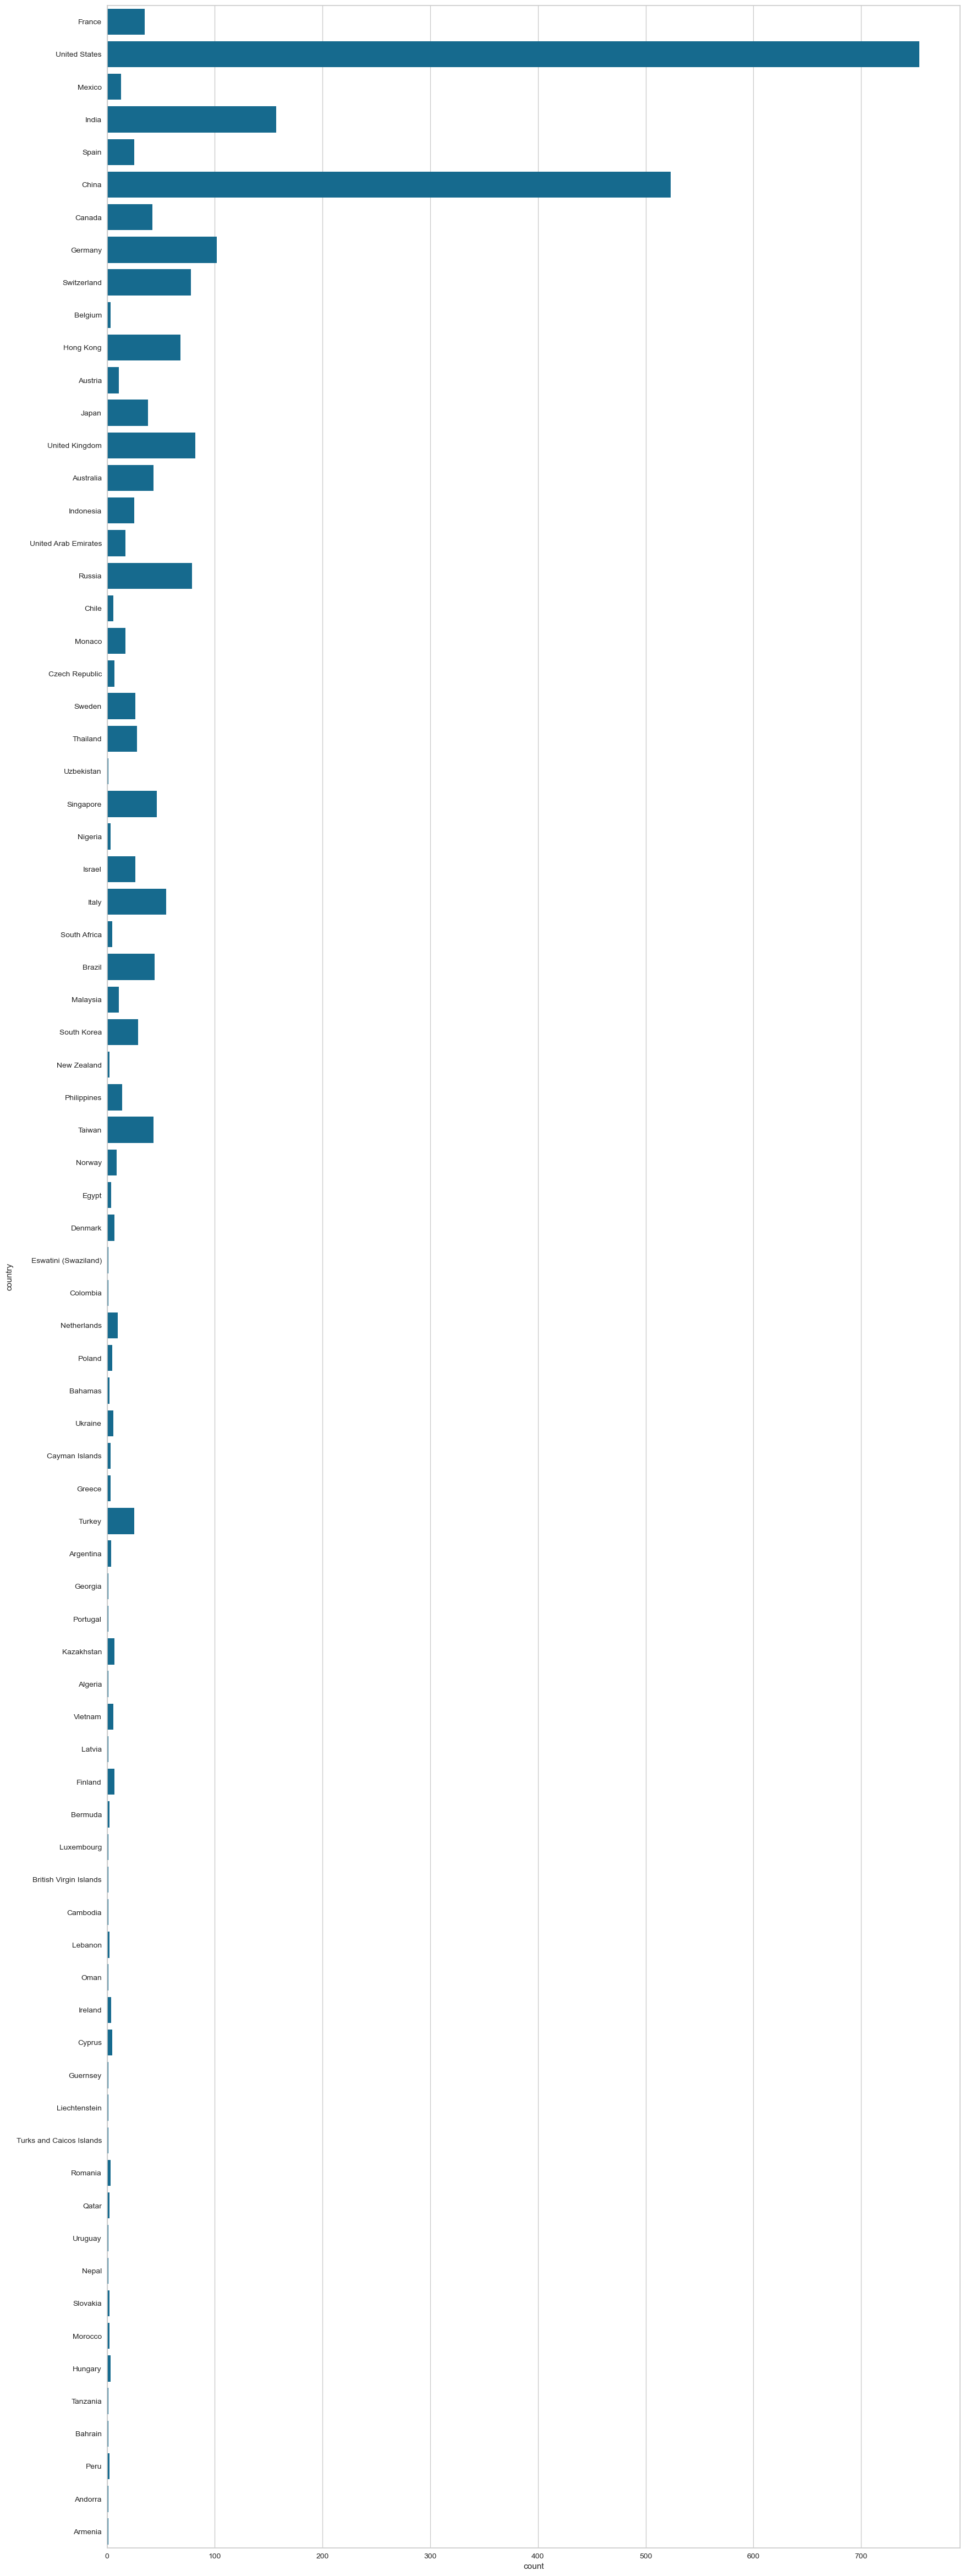

In [60]:
plt.figure(figsize=(20,60))
sns.countplot(y=df['country']);

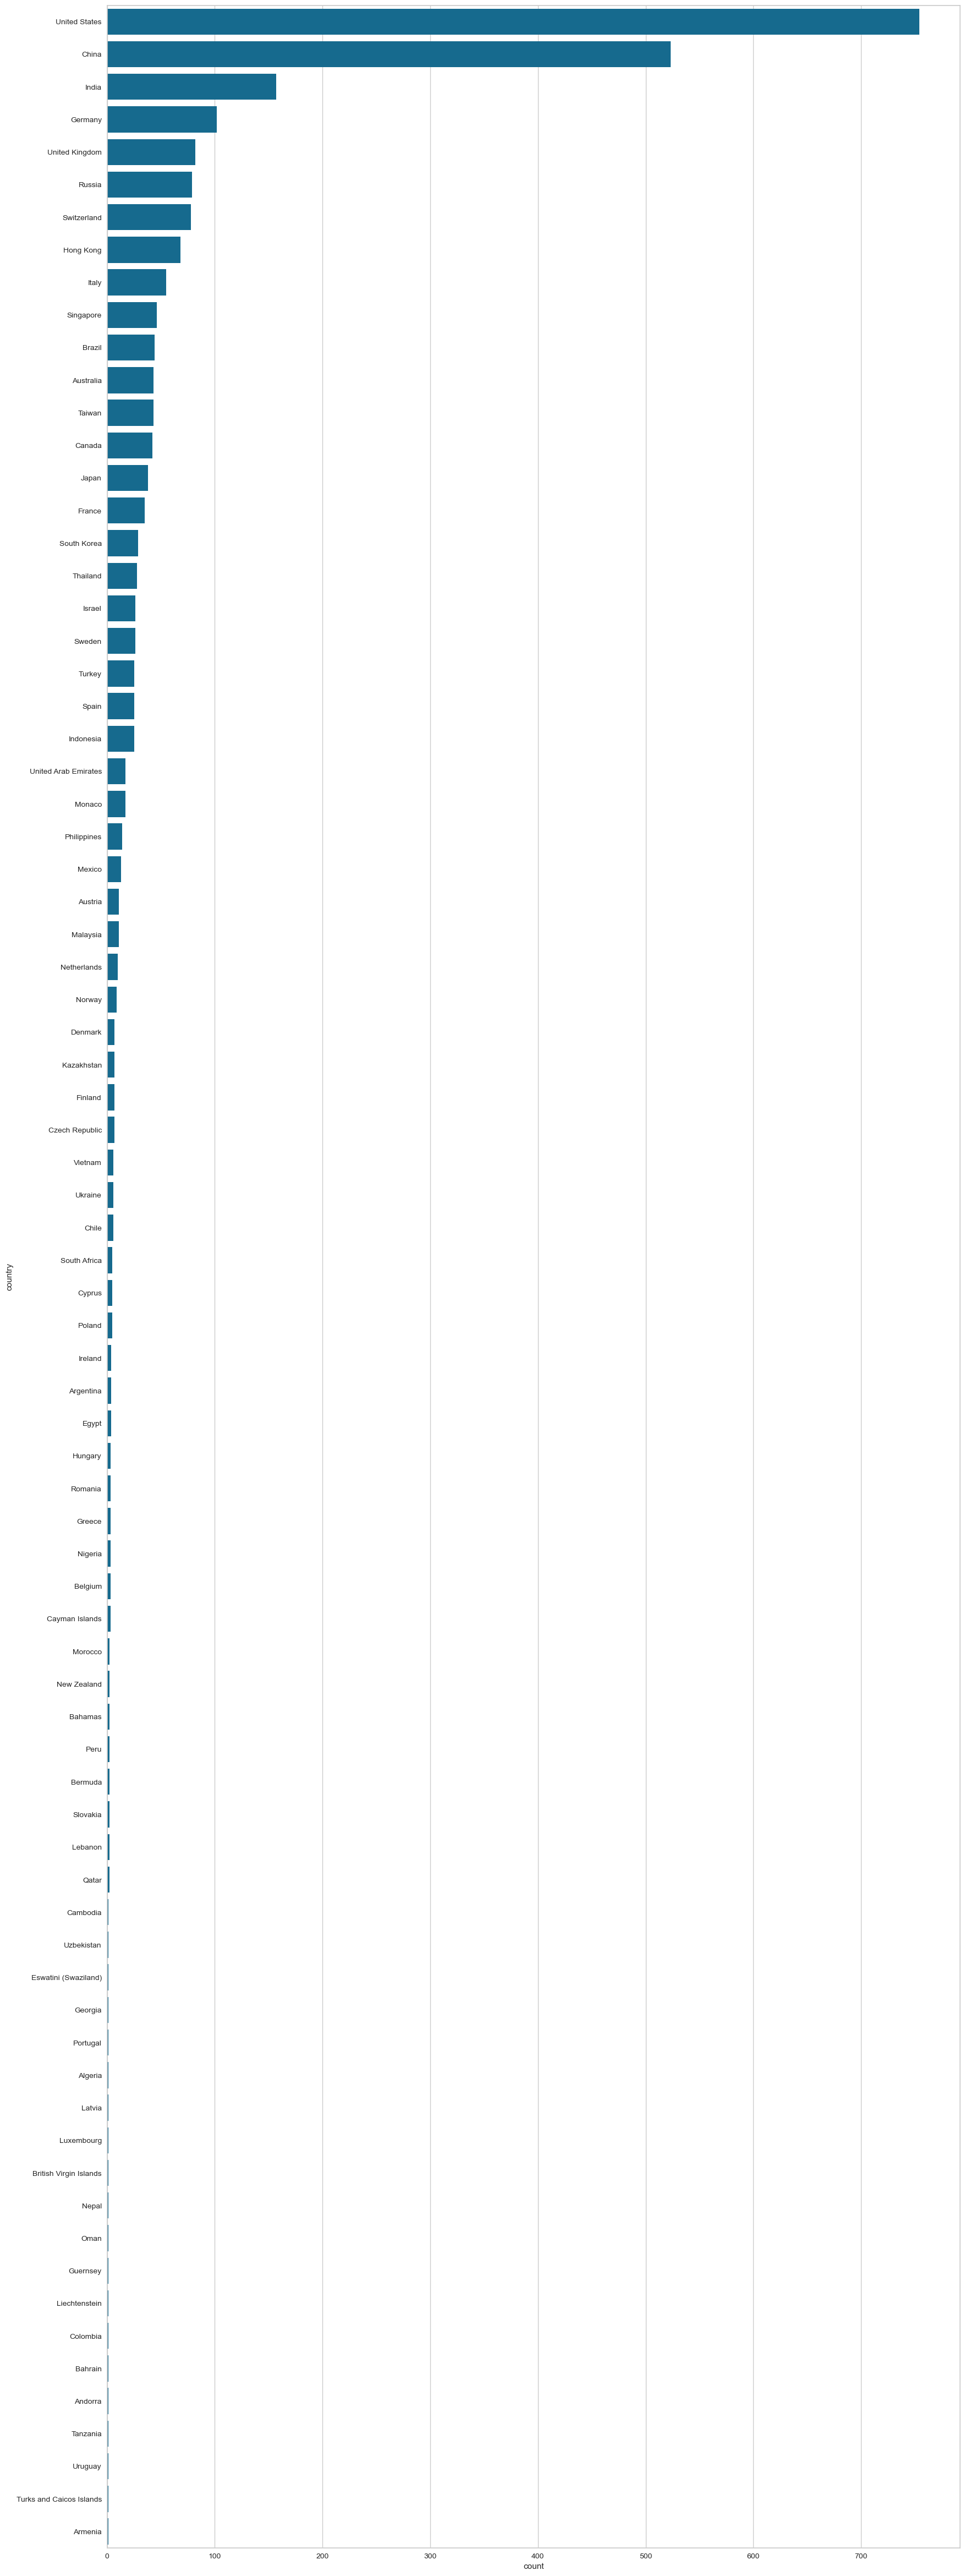

In [62]:
ydf=df['country'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'],order=ydf.index);

In [64]:
tr=df[df['country']=='Turkey']

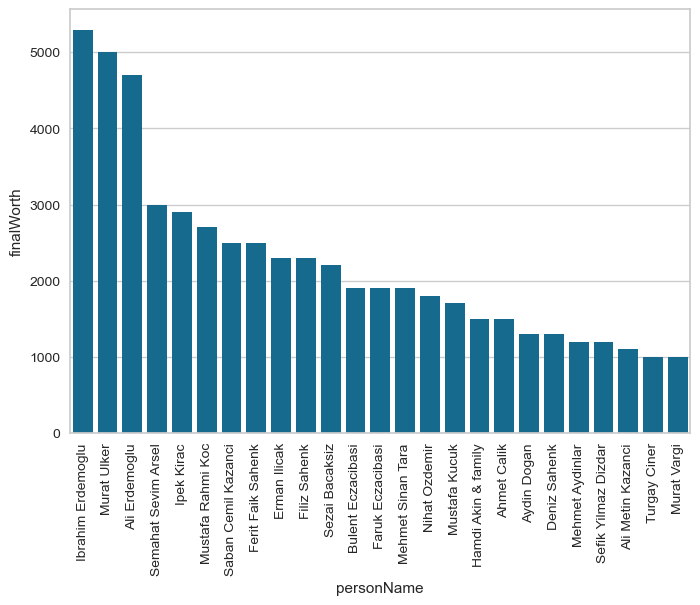

In [68]:
sns.barplot(x=tr['personName'],y=tr['finalWorth'])
plt.xticks(rotation=90);

<Axes: xlabel='selfMade', ylabel='count'>

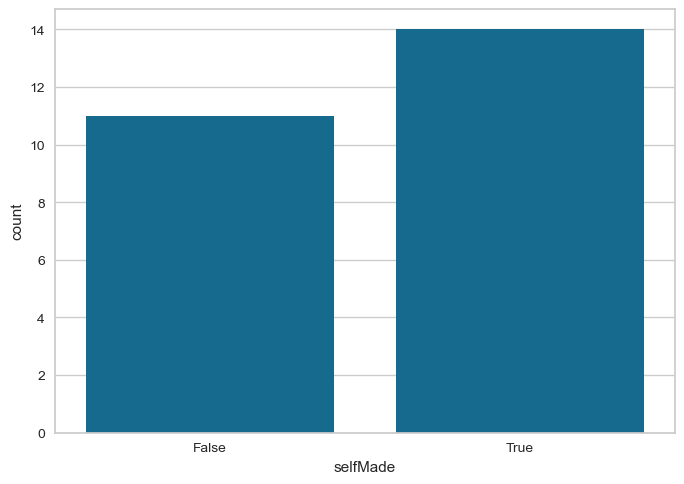

In [69]:
sns.countplot(x=tr['selfMade'])

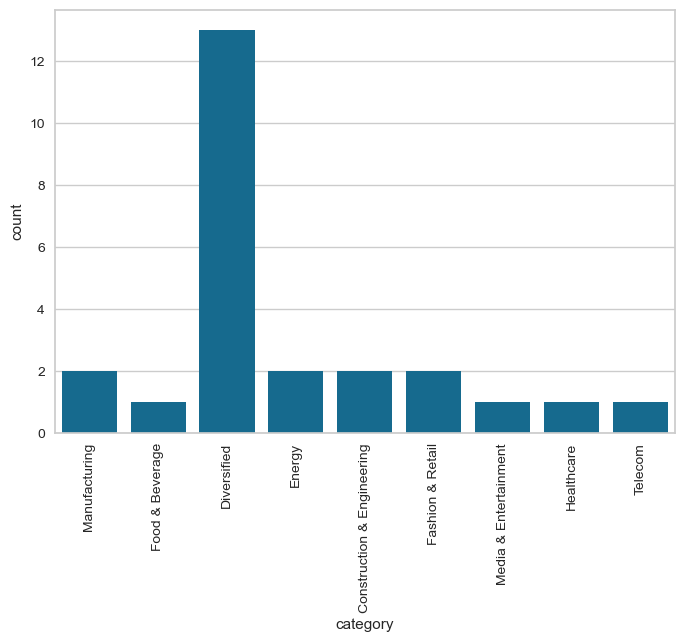

In [71]:
sns.countplot(x=tr['category'])
plt.xticks(rotation=90);
plt.show()

<Axes: xlabel='gender', ylabel='count'>

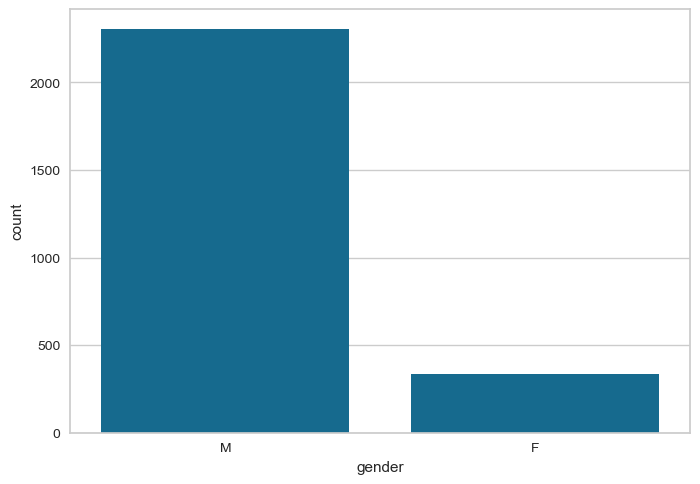

In [72]:
sns.countplot(x=df['gender'])

In [73]:
df['gender'].value_counts()

gender
M    2303
F     337
Name: count, dtype: int64

In [74]:
337/len(df)

0.12765151515151515

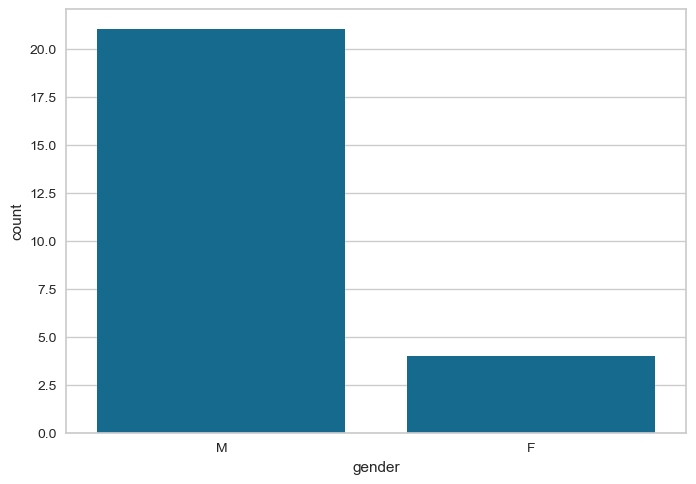

In [76]:
sns.countplot(x=tr['gender']);